Disciplina: SCC5948_Ciência_de_dados

Normando de Campos Amazonas Filho

NUSP: 11561949

#Dados desbalanceados

No dataset que será utilizado nesse exercício, cada elemento representa uma transação com cartões de crédito.

A base possui 30 atributos. `Time` representa o tempo em segundos desde a primeira transação da base. `Amount` corresponde ao valor da transação.

Outros 28 atributos numéricos anonimizados também são fornecidos, com 1 variável (`Class`) de saída onde 1 significa fraude e 0 transação normal.

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

**Esse exerício possui material complementar ("Undersampling e Oversampling")**

### Questão 01.
Carregue o dataset `creditcard_sampled.csv` e mostre a distribuição das classes:

*   Via histograma
*   Exibindo o número de ocorrências de cada classe



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
dados = pd.read_csv('creditcard_sampled.csv', index_col=0)
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9476 entries, 0 to 9475
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  9476 non-null   int64  
 1   Time        9476 non-null   float64
 2   V1          9476 non-null   float64
 3   V2          9476 non-null   float64
 4   V3          9476 non-null   float64
 5   V4          9476 non-null   float64
 6   V5          9476 non-null   float64
 7   V6          9476 non-null   float64
 8   V7          9476 non-null   float64
 9   V8          9476 non-null   float64
 10  V9          9476 non-null   float64
 11  V10         9476 non-null   float64
 12  V11         9476 non-null   float64
 13  V12         9476 non-null   float64
 14  V13         9476 non-null   float64
 15  V14         9475 non-null   float64
 16  V15         9475 non-null   float64
 17  V16         9475 non-null   float64
 18  V17         9475 non-null   float64
 19  V18         9475 non-null  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3f11c24d68>]],
      dtype=object)

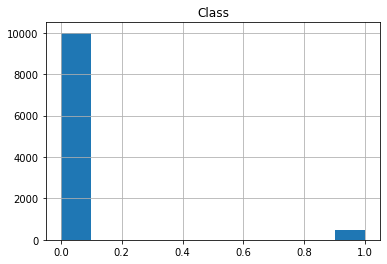

In [ ]:
dados.hist('Class')

In [ ]:
dados['Class'].value_counts()

0    10000
1      492
Name: Class, dtype: int64



---

### Questão 02.

Separe o conjunto de dados em variáveis de entrada e variável alvo.

In [ ]:
inputs = dados.iloc[:, :-1].to_numpy()
targets = dados.iloc[:, -1].to_numpy()

print(np.bincount(targets))

[10000   492]




---

### Questão 03.

Crie uma função que aplique a técnica de subamostragem aleatória nesse conjunto de dados.
- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função e deve retornar um novo conjunto onde todas as classes devem ter o número de ocorrências da classe com **menor representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes

492


(array([492.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 492.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

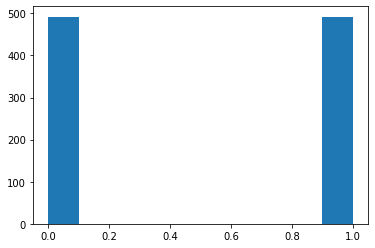

In [ ]:
def undersample(inputs, targets):
  # Separando os ids dos elementos que pertecem à cada classe
  classe_0_ids = np.where(targets == 0)[0]
  classe_1_ids = np.where(targets == 1)[0]

  # Guardando quantos elementos temos em cada classe
  tamanhos_classes = [len(x) for x in [classe_0_ids, classe_1_ids]]
  menor_classe = np.min(tamanhos_classes)

  # Usando numpy para fazer amostragem aleatória sem repetição (replace=false), selecionando o nro de elementos da menor classe
  # Assim teremos todos os elementos da menor classe e o mesmo nro da maior
  classe_0_sampled_ids = np.random.choice(classe_0_ids, size=menor_classe, replace=False)
  classe_1_sampled_ids = np.random.choice(classe_1_ids, size=menor_classe, replace=False)

  # Até agora estávamos apenas operando nos IDs agora vamos pegar os elementos selecionados no inputs
  undersampled_data = np.concatenate([inputs[classe_0_sampled_ids],
                                 inputs[classe_1_sampled_ids]])
  # O mesmo é feito para o target
  undersampled_targets = np.concatenate([targets [classe_0_sampled_ids],
                                      targets [classe_1_sampled_ids]])
  return undersampled_data, undersampled_targets

undersampled_data, undersampled_targets = undersample(inputs, targets)
plt.hist(undersampled_targets)



---

### Questão 04.

Crie uma função que aplique a técnica de superamostragem aleatória nesse conjunto de dados.

- Sua função deve receber como entrada a base normalizada e as classes.

- Sua função deve receber como entrada a base original e retornar um novo conjunto de dados onde todas as classes devem ter o número de ocorrências da classe com **maior representatividade no conjunto de dados inicial** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes

(array([10000.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 10000.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

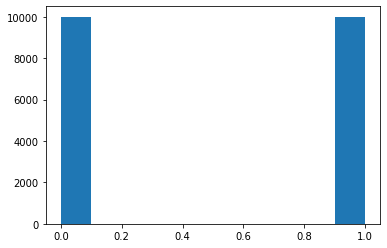

In [ ]:
def oversample(inputs, targets):
  # Separando os ids dos elementos que pertecem à cada classe
  classe_0_ids = np.where(targets == 0)[0]
  classe_1_ids = np.where(targets == 1)[0]

  # Computando o nro de elementos de cada classe e definindo o nro de elementos
  # da classe majoritária
  tamanhos_classes = [len(x) for x in [classe_0_ids, classe_1_ids]]
  maior_classe = np.max(tamanhos_classes)

  # Se tivermos menos elementos do que a maior classe, estamos trabalhando na classe minoritária
  # Assim, queremos fazer oversample (replace=True) para aumentar o nro de elementos
  replace = False
  if tamanhos_classes[0] < maior_classe:
    replace = True
  classe_0_sampled_ids = np.random.choice(classe_0_ids, size=maior_classe, replace=replace)

  # Da mesma forma para a segunda classe
  replace = False
  if tamanhos_classes[1] < maior_classe:
    replace = True
  classe_1_sampled_ids = np.random.choice(classe_1_ids, size=maior_classe, replace=replace)

  # Até agora estávamos apenas operando nos IDs agora vamos pegar os elementos selecionados no inputs
  oversampled_data = np.concatenate([inputs[classe_0_sampled_ids],
                                 inputs[classe_1_sampled_ids]])
  # O mesmo é feito com o target
  oversampled_targets = np.concatenate([targets [classe_0_sampled_ids],
                                      targets [classe_1_sampled_ids]])
  return oversampled_data, oversampled_targets

oversampled_data, oversampled_targets = oversample(inputs, targets)
plt.hist(oversampled_targets)

---

### Questão 05.

Crie uma função que utilize técnicas de subamostragem e superamostragem nesse conjunto de dados para balancear o número de exemplos de cada classe.

- Sua função deve receber como entrada a base normalizada e as classes.
- Sua função deve receber como entrada a base original e retornar uma nova base onde todas as classes devem ter o número de ocorrências **igual à $\frac{tamanho\_dataset}{3}$** e um array com as respectivas labels.
- Mostre o resultado plotando um histograma da distribuição resultante classes

(array([3497.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        3497.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

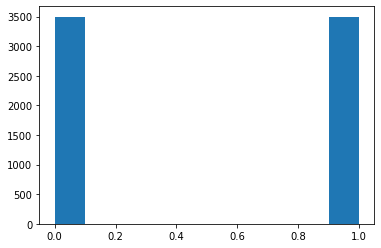

In [ ]:
def dataset_sample(inputs, targets):
  # O número de elementos desejado é goal_size (isso também poderia vir por parâmetro)
  goal_size = int(len(targets) / 3)

  # Separando os ids dos elementos que pertecem à cada classe
  classe_0_ids = np.where(targets == 0)[0]
  classe_1_ids = np.where(targets == 1)[0]
  tamanhos_classes = [len(x) for x in [classe_0_ids, classe_1_ids]]

  # Assim como no oversample, decidimos se faremos amostragem com ou sem repetição comparando
  # o número de elementos da classe com o objetivo. Agora queremos que cada classe tenha goal_size elementos
  replace = False
  if tamanhos_classes[0] < goal_size:
    replace = True
  classe_0_sampled_ids = np.random.choice(classe_0_ids, size=goal_size, replace=replace)

  replace = False
  if tamanhos_classes[1] < goal_size:
    replace = True
  classe_1_sampled_ids = np.random.choice(classe_1_ids, size=goal_size, replace=replace)

  # Até agora estávamos apenas operando nos IDs agora vamos pegar os elementos selecionados no inputs
  dataset_sampled_data = np.concatenate([inputs[classe_0_sampled_ids],
                                 inputs[classe_1_sampled_ids]])
  # O mesmo para o target
  dataset_sampled_targets = np.concatenate([targets [classe_0_sampled_ids],
                                      targets [classe_1_sampled_ids]])
  return dataset_sampled_data, dataset_sampled_targets

dataset_sampled_data, dataset_sampled_targets = dataset_sample(inputs, targets)
plt.hist(dataset_sampled_targets)



---

### Questão 06.
- Complete a função *model_tester* de forma que a base seja alterada caso uma função de amostragem seja passada como parâmetro.

- Normalize as **variáveis de entrada** entre 0 e 1 (`sklearn.preprocessing.MinMaxScaler`). Lembre-se que não podemos utilizar dados do conjunto de teste durante o *fit* do objeto *scaler*

- Teste o score de classificação, utilizando a função `model_tester` abaixo, para cada função criada nas questões anteriores utilizando os dados normalizados.

In [ ]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import precision_score
from sklearn.metrics import balanced_accuracy_score
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def model_tester(inputs, target, sampler_func=None, weights=None):
  """
  Executa classificação do conjunto de dados passado
  ---------------------------------------------------------------
  inputs:     Variáveis de entrada (X)
  target:     Variáveis alvo (y)
  sampler_func: Uma função que irá balancear os dados de acordo com a
                distribuição das classes
  weights:    Dicionário com o peso de cada classe. Cada chave do dicionário é
              uma classe, e seu valor o associado a essa classe. Por exemplo, se
              tivermos duas classes 0 e 1 com mesmo peso, teremos o dicionario:
              {0: 0.5, 1: 0.5}

  ---------------------------------------------------------------
  Realiza a classificação em 3 modelos (SVM com kernel linear,
  SVM com kernel polinomial de grau 3, Árvore de decisão)
  O desempenho é calculado utilizando a acurácia balanceada.
  """

  if isinstance(inputs, pd.core.frame.DataFrame):
    inputs = inputs.values
  if isinstance(target, pd.core.frame.DataFrame) or isinstance(target, pd.core.series.Series):
    target = target.values
  testes = {
    "SVM Linear" : SVC(kernel='linear', class_weight=weights),
    "SVM Polinomial grau 3" : SVC(kernel='poly', degree=3, class_weight=weights),
    "Decision Tree (gini)" : DecisionTreeClassifier(criterion='gini', class_weight=weights)
  }
  for teste in testes:
    clf = testes[teste]
    skf = StratifiedKFold(n_splits=10)
    scores = []
    # para cada split do k-fold
    for train_index, test_index in skf.split(inputs, target):
      if sampler_func is None:
        X_train, y_train = inputs[train_index], target[train_index]
        X_test, y_test = inputs[test_index], target[test_index]
      else:
        X_train, y_train = sampler_func(inputs[train_index], target[train_index])
        X_test, y_test = inputs[test_index], target[test_index]
      # Normalizamos utilizando os dados de treinamento tanto o conjunto de
      # treinamento quanto de teste
      scaler = MinMaxScaler()
      X_train = scaler.fit_transform(X_train)
      X_test = scaler.transform(X_test)

      clf.fit(X_train, y_train)
      y_pred = clf.predict(X_test)
      # scores.append(precision_score(y_test, y_pred,labels=[-1, 0, 1], average='macro', zero_division=0))
      scores.append(balanced_accuracy_score(y_test, y_pred))
    print("Score do classificador '%s': %.2f" % (teste, np.mean(scores)*100))

In [ ]:
# print("--- original data ---")
# model_tester(inputs, targets)

# print("--- oversampled_data ---")
# model_tester(inputs, targets, oversample)

print("--- undersampled_data ---")
model_tester(inputs, targets, undersample)

# print("--- dataset_sampled_data ---")
# model_tester(inputs, targets, dataset_sample)




---

### Questão 07.

Teste o score de classificação no conjunto original alterando o parâmetro `weights`. Esse parâmetro faz com que o algoritmo de classificação leve em conta o peso de cada classe no processo de treinamento.

- Teste 2 conjuntos de `weights` diferentes e compare com o resultado do conjunto original sem o uso dessa variavel.

- Combine os pesos com um dos métodos de amostragem de sua escolha

In [ ]:
print("--- Balanced weighted data ---")
w = {0: 0.5, 1: 0.5}
model_tester(inputs, targets, weights=w)

print("--- Balanced weighted data ---")
w = {1: 0.1, 0: 0.99}
model_tester(inputs, targets,  weights=w)


print("--- Undesampled Balanced weighted data ---")
w = {0: 0.5, 1: 0.5}
model_tester(inputs, targets, undersample, weights=w)

print("--- Undesampled Balanced weighted data ---")
w = {1: 0.1, 0: 0.99}
model_tester(inputs, targets, undersample, weights=w)

### Questão 08.

Implemente o algoritmo SMOTE e aplique-o na base de forma que a classe minoritaria cresça em 300%.

Dicas:

- Considere aumentos a partir de 100% do conjunto (dobrar o número de exemplos)

- O algoritmo SMOTE executa as seguinte etapas (Adaptado do artigo: https://arxiv.org/pdf/1106.1813.pdf):

  - Encontre os k vizinho mais próximo (distância euclidiana do vetor de atributos) de cada elemento da classe minoritaria
  - Para cada elemento E da classe minoritaria:
      - Escolha um dos k vizinhos de E, L aleatoriamente
      - Calcule a diferença D entre os atributos (L-E)
      - Calcule um número aleatório G entre 0 e 1
      - Novo elemento = E + D*G

- Dados dois numpy arrays x e y, a distância euclidiana pode ser calculada com `np.linalg.norm(x-y)`

Pseudo-código no artigo:

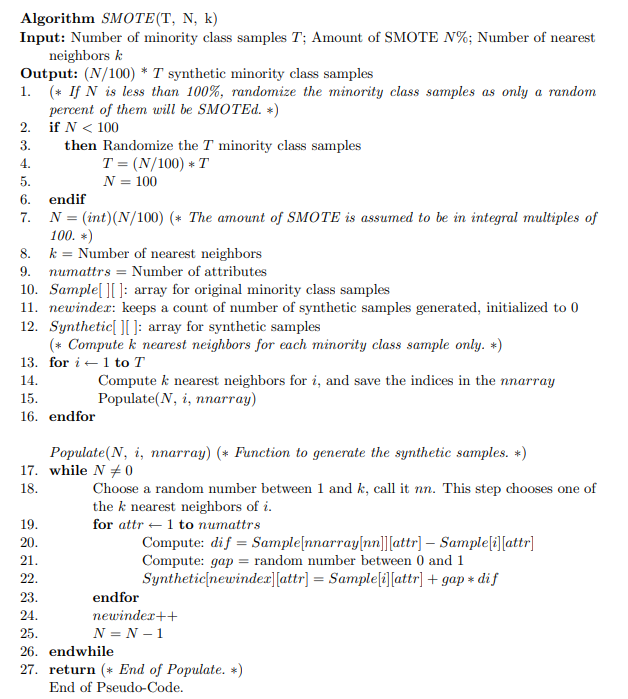

In [ ]:
def nn(elem, data, k):
  # distância euclidiana de todos os elementos em data com elem
  distancias = np.linalg.norm(data-elem, axis=0)
  # Selecionando os k mais próximos
  k_proximos = np.argsort(distancias)[:k]
  return k_proximos

def populate(elem, vizinhos, k, num_sinteticos):
    novos_elementos = []
    for _ in range(num_sinteticos):
      # Escolhendo um vizinho aleatório
      L_id = np.random.random_integers(0, k-1, size=1)
      L = vizinhos[L_id]
      dif = L - elem
      # gerando um ruído aleatório
      gap = np.random.uniform(low=0, high=1, size=1)
      # O novo elemento é dado pelo elemento base somado à sua diferença ao vizinho multiplicada ao ruído
      S = elem + gap*dif
      novos_elementos.append(S)
    return novos_elementos

def smote(df, num_vizinhos=3, pct_novos_ex=300):
  '''
  df: dataframe com a base de dados (apenas atributos numericos)
  num_vizinhos: quantos vizinhos mais próximos devemos considerar para cada exemplo existente
  pct_novos: quantos exemplos criar. Ex: 300 = deixar a classe minoritaria 3x maior
  '''
  N = int(pct_novos_ex/100)
  minoritario = df[df['Class'] == 1].to_numpy()
  elem_sinteticos = []
  for i, E in enumerate(minoritario):
    vizinhos = nn(E, minoritario, k=num_vizinhos)
    elem_sinteticos.extend(populate(E, vizinhos, num_vizinhos, N))
  return elem_sinteticos

dat = dados.drop(columns=['Time'])
smote(dat)